In [6]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Home

In [7]:
# The starter code is short and simple, take a look!
from starter import *
import random
import numpy
import math
from collections import defaultdict

# Phase 1 - Create Inputs

In [8]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # TODO add edges to complete the small input
    G.add_nodes_from(range(N_SMALL))
    num_edges = 0
    sum_weight = 500000
    unlucky_nodes = [20, 21, 22]
    while sum_weight >= 0:
        weight = random.randint(0, 1000)
        node1 = random.randint(0, N_SMALL-1)
        node2 = random.randint(0, N_SMALL-1)
        if node1 != node2 and node1 not in unlucky_nodes and node2 not in unlucky_nodes:
            if not (node1, node2) in G.edges([node1, node2]) and num_edges <= MAX_EDGES:
                G.add_edge(node1, node2, weight=weight)
                sum_weight -= weight
                num_edges += 1
            else:
                old_weight = G.edges[node1, node2]['weight']
                sum_weight -= min(weight, 1000 - old_weight)
                weight = min(1000, weight + old_weight)
                G.edges[node1, node2]['weight'] = weight
    return G
    
def medium(G: nx.Graph):
    # TODO add edges to complete the medium input
    G.add_nodes_from(range(N_MEDIUM))
    num_edges = 0
    sum_weight = 750000
    unlucky_nodes = [20, 200, 210, 222]
    while sum_weight >= 0:
        weight = random.randint(1, 1000)
        node1 = random.randint(0, N_MEDIUM-1)
        node2 = random.randint(0, N_MEDIUM-1)
        if node1 != node2 and node1 not in unlucky_nodes and node2 not in unlucky_nodes:
            if not (node1, node2) in G.edges([node1, node2]) and num_edges <= MAX_EDGES:
                G.add_edge(node1, node2, weight=weight)
                sum_weight -= weight
                num_edges += 1
            else:
                old_weight = G.edges[node1, node2]['weight']
                sum_weight -= min(weight, 1000 - old_weight)
                weight = min(1000, weight + old_weight)
                G.edges[node1, node2]['weight'] = weight
    return G
    
def large(G: nx.Graph):
    # TODO add edges to complete the large input
    G.add_nodes_from(range(N_LARGE))
    num_edges = 0
    sum_weight = 1000000
    unlucky_nodes = [i for i in range(N_LARGE) if i % 10 == 2]
    while sum_weight >= 0:
        weight = random.randint(1, 1000)
        node1 = random.randint(0, N_LARGE-1)
        node2 = random.randint(0, N_LARGE-1)
        if node1 != node2 and node1 not in unlucky_nodes and node2 not in unlucky_nodes:
            if not (node1, node2) in G.edges([node1, node2]) and num_edges <= MAX_EDGES:
                G.add_edge(node1, node2, weight=weight)
                sum_weight -= weight
                num_edges += 1
            else:
                old_weight = G.edges[node1, node2]['weight']
                sum_weight -= min(weight, 1000 - old_weight)
                weight = min(1000, weight + old_weight)
                G.edges[node1, node2]['weight'] = weight
    return G

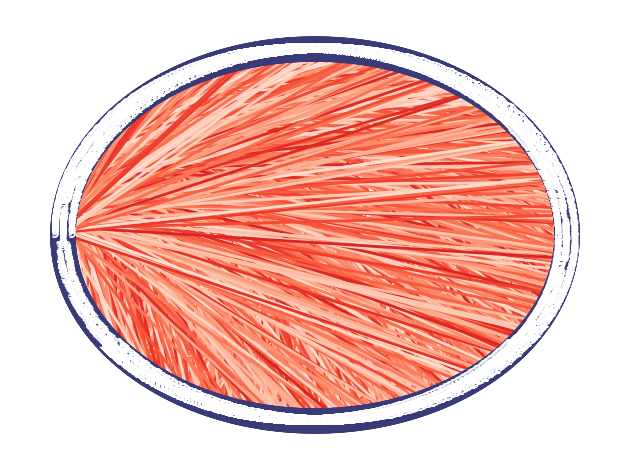

In [9]:
'''G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in')
visualize(G)

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in')
visualize(G)

'''
G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in')
visualize(G)

# Phase 2 - Implement your Solver

In [10]:
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']
    def getWeight(pair):
        u,v = pair
        return G[u][v]['weight']
    edges = sorted(list(G.edges), key=getWeight, reverse=False)
    num_vertices = len(G.nodes)
    for node in G.nodes:
        G.nodes[node]['team'] = 1
        
    def helper(G):
        overall_best_copy = G.copy()
        overall_best_score = float('inf')
        best_score = float('inf')
        counter = 0 # num of times that we haven't updated the overall_best_score
        for k in range(2, num_vertices):
            counter += 1
            # start with all penguins in random teams
            for node in G.nodes:
                G.nodes[node]['team'] = random.randint(1,k)
            s = score(G)
            if s > overall_best_score * 10 or counter > 3:
                break
            best_copy = G.copy()
            best_score = s
            for _ in range(len(G.nodes)):
                modified = False
                for u, v in edges:
                    if G.nodes[u]['team'] == G.nodes[v]['team']:
                        # repeteatedly, randomly pick new teams, and use the best assignment
                        for i in range(min(k-1,math.ceil(3000/num_vertices))):
                            old_score = s
                            old_u_team = G.nodes[u]['team']
                            old_v_team = G.nodes[v]['team']
                            new_u_team = random.choice(list(range(1,old_u_team)) + list(range(old_u_team+1,k+1)))
                            new_v_team = random.choice(list(range(1,old_v_team)) + list(range(old_v_team+1,k+1)))

                            G.nodes[u]['team'] = new_u_team # u changed
                            new_u_score = score(G)
                            G.nodes[v]['team'] = new_v_team # u,v changed
                            new_uv_score = score(G)
                            G.nodes[u]['team'] = old_u_team # v changed
                            new_v_score = score(G)

                            # get the minimum score
                            s = min(old_score, new_u_score, new_uv_score, new_v_score)
                            change = []
                            if s == old_score: # neither changes
                                G.nodes[v]['team'] = old_v_team
                            else:
                                modified = True
                                if s == new_u_score: # u changes
                                    G.nodes[u]['team'] = new_u_team
                                    G.nodes[v]['team'] = old_v_team
                                    change = [(u, new_u_team)]
                                elif s == new_uv_score: # u,v changes
                                    G.nodes[u]['team'] = new_u_team
                                    change = [(u, new_u_team), (v, new_v_team)]
                                else: # else v changes
                                    change = [(v, new_v_team)]
                            if s < best_score:
                                best_score = s
                                # print(best_score)
                                for node, new_team in change:
                                    best_copy.nodes[node]['team'] = new_team
                if not modified:
                    break
                if best_score < overall_best_score:
                    counter = 0
                    overall_best_score = best_score
                    overall_best_copy = best_copy.copy()
                    # print(overall_best_score, 'best')
                    
        for node in G.nodes:
            G.nodes[node]['team'] = overall_best_copy.nodes[node]['team']
        #return best_copy, best_score
    
    '''for _ in range(1): # repeat to get best result
        b_copy, b_score = helper(G)
        if b_score < overall_best_score:
            overall_best_copy = b_copy.copy()
            overall_best_score = b_score
    for node in G.nodes:
        G.nodes[node]['team'] = overall_best_copy.nodes[node]['team']'''
    helper(G)

244804.96750011572
244330.3171492692
241123.27491215552
239929.07019425914
237907.51928139728
234942.51928139728
234801.8281828459
229355.07019425914
228278.51928139728
227684.07019425914
227571.51928139728
226949.07019425914
226656.51928139728
225117.8281828459
224555.51928139728
224212.8281828459
223033.51928139728
221562.8281828459
219592.51928139728
214581.8281828459
212246.51928139728
210969.8281828459
207207.51928139728
206463.8281828459
199660.51928139728
198386.8281828459
197081.51928139728
196597.8281828459
196540.51928139728
196281.07019425914
193648.51928139728
193256.07019425914
192995.51928139728
191627.07019425914
191256.3171492692
190983.27491215552
190453.3171492692
188279.07019425914
186066.51928139728
185272.07019425914
183290.51928139728
182630.07019425914
181196.51928139728
180193.07019425914
179589.51928139728
179281.8281828459
178578.51928139728
177719.07019425914
176381.51928139728
175238.8281828459
174461.51928139728
173977.8281828459
172583.51928139728
168885.0

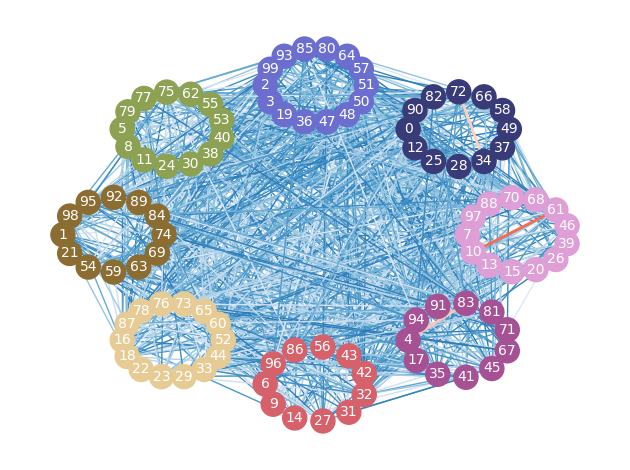

6973.96354384873

In [11]:
G = read_input('small.in')
solve(G)
validate_output(G)
visualize(G)
score(G)

run(solve, 'small.in', 'small.out')

In [12]:
run_all(solve, 'inputs', 'outputs')
tar('outputs')

  0%|          | 0/390 [00:00<?, ?it/s]

254236.93224356923
253736.04713292673
253235.17397775385
251875.04713292673
251368.17397775385
249905.4686396577
249397.63934678014
248121.82781780922
247942.0359012699
247460.26563804605
246947.0359012699
244725.26563804605
242927.0359012699
242413.26563804605
241108.51928139728
240589.26563804605
239549.51928139728
237289.79931905912
235092.1084976426
233763.79931905912
233237.1084976426
232503.4498495731
231262.1084976426
230426.79931905912
229186.1084976426
228452.4498495731
227918.82672283245
227552.24281379575
225792.70220348565
222594.24281379575
221179.70220348565
220637.24281379575
220094.70220348565
218709.24281379575
218158.82672283245
216835.24281379575
215385.4498495731
214828.82672283245
213616.4498495731
213059.82672283245
213035.4498495731
211666.24281379575
211103.70220348565
209766.20939759898
209200.76937069863
208706.20939759898
208131.70220348565
207257.24281379575
206680.70220348565
206098.24281379575
205514.82672283245
204153.4498495731
202808.82672283245
201410.